# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

from lib import get_city_weather_df

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Note: API call are performed in file lib.py

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

Note: Data Frame Conversion is performed in file lib.py

In [59]:
cities_df=get_city_weather_df(1000, force_new=False)
cities_df.head()

Data loaded from cache


,Lng,Lat,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,42.547521,-69.659974,port alfred,za,248.38,98,100,7.23,1622314428
1,-3.535401,0.690837,axim,gh,300.56,76,100,7.33,1622314429
2,-148.309941,5.374525,hilo,us,300.33,82,8,5.93,1622314429
3,50.876688,71.751869,belushya guba,ru,272.64,98,100,6.63,1622314430
4,89.088050,-48.883443,busselton,au,281.66,95,100,13.42,1622314430


In [60]:
cities_df.describe()

,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,-1.832621,-0.658573,280.009930,76.581000,66.786000,6.352630,1.622315e+09
std,102.831126,52.826910,21.500725,19.214282,39.626765,3.529759,1.203921e+02
min,-179.732615,-89.998294,213.870000,6.000000,0.000000,0.390000,1.622314e+09
25%,-91.357243,-47.738110,272.347500,71.000000,23.000000,3.637500,1.622315e+09
50%,-1.278046,0.598697,283.245000,80.000000,94.500000,5.985000,1.622315e+09
75%,86.029047,44.743514,297.482500,90.000000,100.000000,8.332500,1.622315e+09
max,179.926128,89.933004,312.040000,100.000000,100.000000,19.760000,1.622315e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
cities_df[cities_df['Humidity'] > 100]

,Lng,Lat,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [62]:
# Drop all records with humidity greater that 100
cities_df.drop(cities_df[cities_df['Humidity'] > 100].index, inplace = True)

In [63]:
cities_df[cities_df['Humidity'] > 100]

,Lng,Lat,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

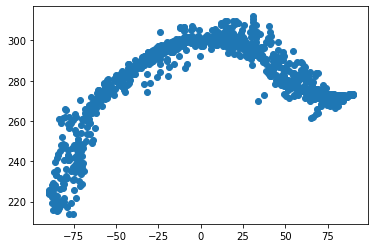

In [64]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp']);

## Latitude vs. Humidity Plot

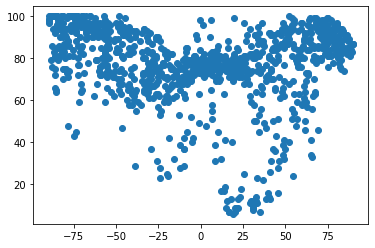

In [65]:
plt.scatter(cities_df['Lat'], cities_df['Humidity']);

## Latitude vs. Cloudiness Plot

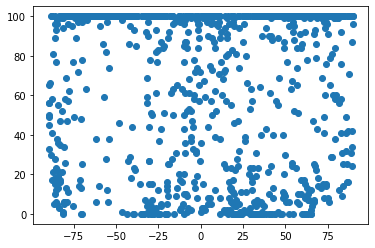

In [66]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness']);

## Latitude vs. Wind Speed Plot

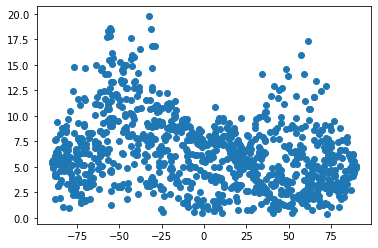

In [67]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed']);

## Linear Regression

In [68]:
northern_df = cities_df[cities_df['Lat'] > 0].copy()
southern_df = cities_df[cities_df['Lat'] < 0].copy()

In [69]:
northern_df.describe()

,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,0.091733,44.637091,287.185307,73.699010,62.542574,5.288891,1.622315e+09
std,103.801294,26.231580,12.713386,21.971674,41.009032,2.885026,1.204285e+02
min,-179.732615,0.171679,261.260000,6.000000,0.000000,0.390000,1.622314e+09
25%,-87.817380,20.631665,273.200000,71.000000,15.000000,3.100000,1.622315e+09
50%,-1.270581,44.192931,287.710000,80.000000,87.000000,5.040000,1.622315e+09
75%,88.025429,67.986858,299.490000,87.000000,100.000000,7.160000,1.622315e+09
max,178.393158,89.933004,312.040000,100.000000,100.000000,17.330000,1.622315e+09


In [70]:
southern_df.describe()

,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02
mean,-3.795852,-46.869302,272.689596,79.521212,71.115152,7.437859,1.622315e+09
std,101.899322,26.539473,25.760935,15.392143,37.716781,3.790398,1.202332e+02
min,-179.233786,-89.998294,213.870000,23.000000,0.000000,0.480000,1.622314e+09
25%,-96.687852,-70.601980,256.460000,71.000000,36.500000,4.785000,1.622315e+09
50%,-1.285510,-48.089872,279.870000,80.000000,99.000000,7.040000,1.622315e+09
75%,83.903305,-24.345406,294.270000,93.000000,100.000000,9.465000,1.622315e+09
max,179.926128,-0.275230,307.440000,100.000000,100.000000,19.760000,1.622315e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

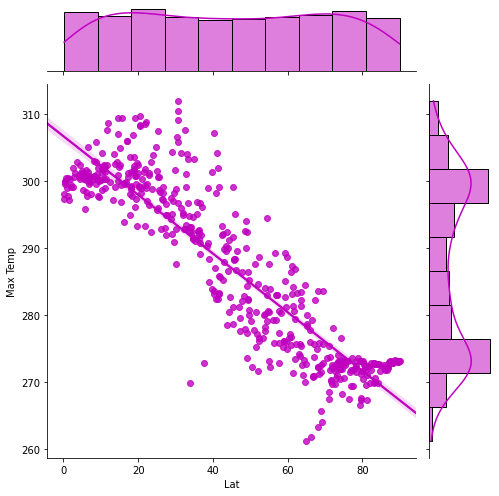

In [71]:
sns_plot = sns.jointplot(x="Lat", y="Max Temp", data=northern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/north_max_temp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

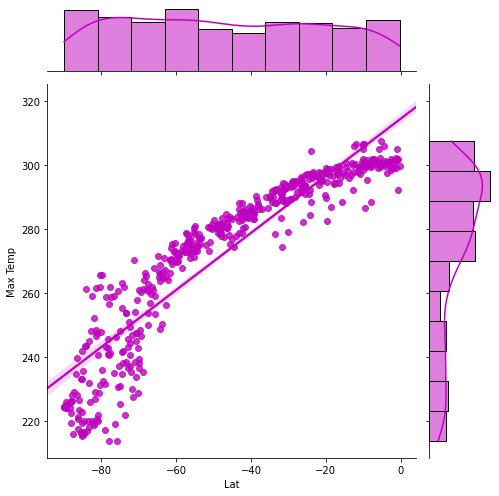

In [72]:
sns_plot = sns.jointplot(x="Lat", y="Max Temp", data=southern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/south_max_temp_lat.png')

As expected, in the regressions of the temperatures in the northern hemisphere tend to go down as the latitude increase, in contrast with the southern hemisphere, where the temp goes up as the latitude increases. This is expected since the farther the latitude is from the equator (lat = 0) the temp should be lower.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

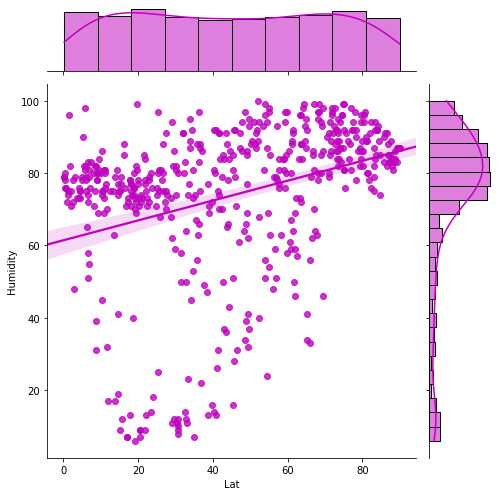

In [73]:
sns_plot = sns.jointplot(x="Lat", y="Humidity", data=northern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/north_humidity_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

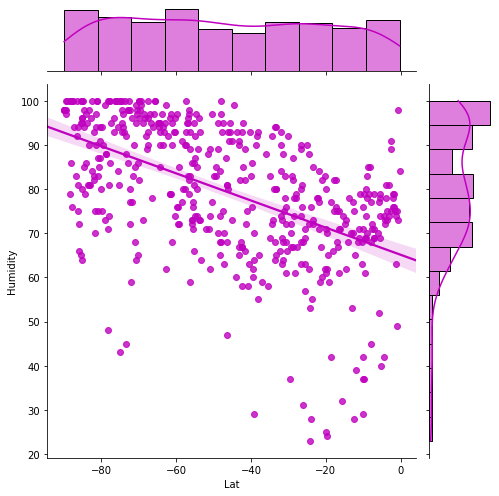

In [74]:
sns_plot = sns.jointplot(x="Lat", y="Humidity", data=southern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/south_humidity_lat.png')

Both trends are inverse, behaving similarly than the temp case. When the latitude goes away form the equator, the humidity increases.

However in this case is not that uniform for all cases. There is a lot of noise, and even that there is an evident trend, is not that strong as in the temp case.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

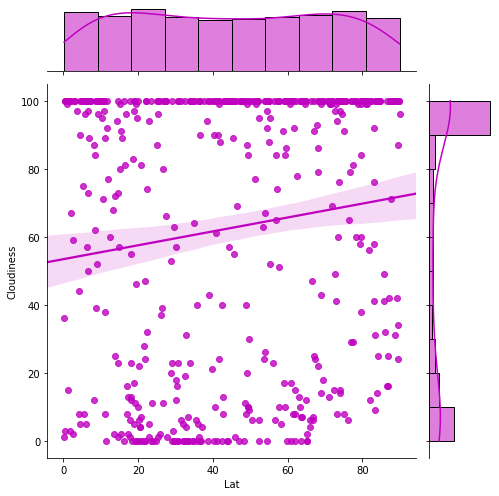

In [75]:
sns_plot = sns.jointplot(x="Lat", y="Cloudiness", data=northern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/north_cloudiness_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

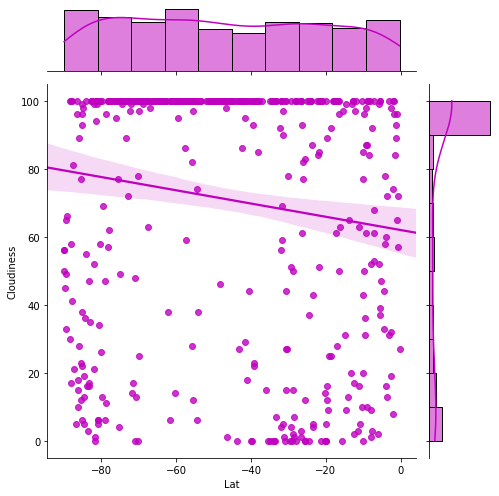

In [76]:
sns_plot = sns.jointplot(x="Lat", y="Cloudiness", data=southern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/south_cloudiness_lat.png')

Same as in the Humidity case, there is a visible trend, but is very noisy and the regression line has a greater error marging.

Also, we can notice that there is a great portion of cloudiness records with value close to 100, independently of the latitude. This plays a role in the error level of the regression.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

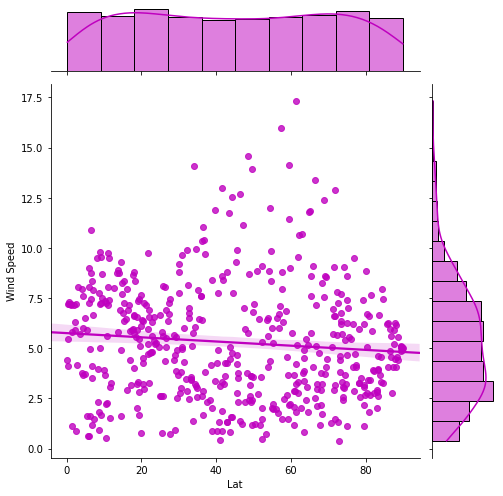

In [77]:
sns_plot = sns.jointplot(x="Lat", y="Wind Speed", data=northern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/north_wind_speed_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

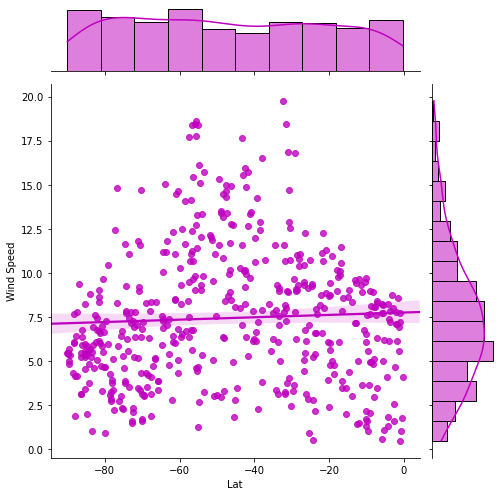

In [78]:
sns_plot = sns.jointplot(x="Lat", y="Wind Speed", data=southern_df,
                  kind="reg", truncate=False,
                  color="m", height=7);
sns_plot.savefig('./out/south_wind_speed_lat.png')                  

The wind speed does have a tendency but is very very mild. In both cases, northern and southernm hemisphere. We could say that there is no relation between the variables.